 ### Task 1: Data Quality
 ## 1.structured data

In [ ]:
ID	class	name	course	score
1372557	A	John	math	72
1425474	C	Ben	math	85.0 
1372558	a	John	math	72
1325390	A	Anna	mathematics	76
1492872	B	Mark	math	633

Here is an example of poor quality structured data. Though it has only 5 samples, there are a lot of problems.  
1.Two samples are duplicated, where the data both indicate John's math scores.  
2.The second sample of John, his class is wrongly written 'a'.  
3.Anna's course is wrongly written 'mathematics', while others are 'math'.  
4.Ben's math score is kept to one decimal place, which is inconsistent with other data.  
5.Mark's math score is far more than 100, which seems to be recorded incorrectly.

For a good structured data, it should be processed as some tables. These tables should meet with the three normal form of database (1NF, 2NF, 3NF). For example, the primary key in a table needs to be unique, while the foreign key needs to point to the primary key of another table. Each feature in the table needs to be specified the data type (such as: int、string）.

## 2.unstructured data

┻┳|  
┳┻| _  
┻┳| •.•) Rockstar, Are The Hackers Gone?  
┳┻|⊂ﾉ  
┻┳|  
/﹋\  
(҂`_´) -AH HELL NO! GO BACK INSIDE!  
<,︻╦╤─ ҉  
/﹋\﻿  
  
https://steamcommunity.com/id/BrownShuggah/recommended/271590/

This is an example of poor quality unstructured data from Steam's game commons. From this character painting, We can easily see that a man is poking his head out of the wall and another man is shooting fiercely. They are talking about *Rockstar* which is the company made game *GTA5* (Grand Theft Auto V). If you are not familiar with this game, you have no idea what they are talking about. When we are prepare to do NLP, this will be even worse. Because computer is hard to read these characters and know its meaning. 

A good non-structure data need to include the information that we want to know. For example, A document for sentiment analysis should contain sentiment tendency words (such as: good、nice、bad、worse). These data should also be easily analyzed by automated programs. If a comment using ‘gooood’ ‘niccce’ instead of normal words, which is difficult to be processed.

 ### Task 2: Yield Curve Modeling
 ## 1.data processing

In [1]:
# Loading libraries
import pandas as pd
import numpy as np
from nelson_siegel_svensson.calibrate import calibrate_ns_ols
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [4]:
# Download China treasury bonds yield data from AKShare
import akshare as ak
bond_china_yield_df = ak.bond_china_yield(start_date="20210201", end_date="20220201")
print(bond_china_yield_df)
yields = bond_china_yield_df[bond_china_yield_df['曲线名称'] == '中债国债收益率曲线'] # We only need Yield curve of China National Debt.

# Data preprocessing  
yields.set_index('日期', inplace=True)  
yields.index = pd.to_datetime(yields.index) # Turn the index to time format
yields.drop(columns=['曲线名称'], inplace=True)  # Delete name column
yields.columns = ['3 Month', '6 Month', '1 Year', '3 Year', '5 Year', '7 Year', '10 Year', '30 Year'] # Rename columns for clarity
yields.loc['2021-12-10'] # Now we only focus on date '2021-12-10'

                    曲线名称          日期      3月      6月      1年      3年      5年  \
0      中债中短期票据收益率曲线(AAA)  2021-02-01  3.2000  3.2000  3.2441  3.6556  3.8008   
1    中债商业银行普通债收益率曲线(AAA)  2021-02-01  3.1085  3.0780  3.0708  3.4459  3.6463   
2              中债国债收益率曲线  2021-02-01  2.4501  2.4235  2.6043  2.8464  2.9899   
3              中债国债收益率曲线  2021-02-02  2.4001  2.4001  2.6227  2.8669  3.0102   
4      中债中短期票据收益率曲线(AAA)  2021-02-02  3.0242  3.1250  3.1934  3.6424  3.8127   
..                   ...         ...     ...     ...     ...     ...     ...   
748  中债商业银行普通债收益率曲线(AAA)  2022-01-29  2.3008  2.4055  2.4566  2.6766  3.0401   
749            中债国债收益率曲线  2022-01-29  1.7876  1.8941  1.9512  2.2327  2.3682   
750    中债中短期票据收益率曲线(AAA)  2022-01-30  2.4486  2.4786  2.4883  2.7475  3.1677   
751  中债商业银行普通债收益率曲线(AAA)  2022-01-30  2.2908  2.4036  2.4566  2.6630  3.0265   
752            中债国债收益率曲线  2022-01-30  1.7756  1.8882  1.9514  2.2318  2.3634   

         7年     10年     30年  
0    3.99

C:\Users\85346\AppData\Local\Temp\ipykernel_13076\3897120833.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yields.drop(columns=['曲线名称'], inplace=True)  # Delete name column


3 Month    2.3201
6 Month    2.3545
1 Year     2.2767
3 Year     2.5956
5 Year     2.7236
7 Year     2.8723
10 Year    2.8426
30 Year    3.3747
Name: 2021-12-10 00:00:00, dtype: float64

AKShare  https://akshare.akfamily.xyz/data/bond/bond.html

Akshare is a financial data interface library based on python. It insists on providing open source financial data, mainly about the Chinese market. Here we use its api for loading China treasury bonds yield data. We adjust the data format to make the same as the examples in M1L3 Lesson Notes. We can see that in this data, China treasury bonds has a range of maturities, but no '1 Month' and '2 Year'. 

 ## 2.Nelson-Siegel model

NelsonSiegelCurve(beta0=3.658740965277316, beta1=-1.3817167750371386, beta2=-0.004367314632396202, tau=6.571965333147492)


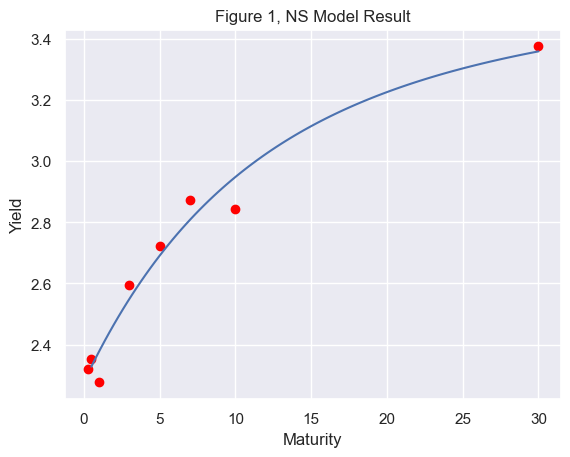

In [5]:
# Create maturity and yield variables in array form
t = np.array([0.25,0.5,1,3,5,7,10,30]) # 0.25 year is 3 months and 0.5 year is 6 months
y = np.array(yields.loc["2021-12-10"])
# Fit an NS model for yields from 2021-12-10
curve, status = calibrate_ns_ols(t, y, tau0=1)  # Select parameter tau0 equal 1
assert status.success # Check if the status is successful
print(curve)
# Draw yield curve using NS model
y_hat = curve
t_hat = np.linspace(0.5,30,100) # The x-axis range from 0.5 to 300 and are divided into 100 points
plt.plot(t_hat, y_hat(t_hat)) # y_hat(t_hat) is the estimated value of NS model at these 100 points
plt.scatter(t, y, c="red") # The red dot is the true points
plt.xlabel("Maturity")
plt.ylabel("Yield")
plt.title("Figure 1, NS Model Result")
plt.show()

In Nelson-Siegel model, Tau0 is the attenuation rate between 0-1. The larger the tau0, the smoother the curve, and the smaller the tau0, the more like a skewed peak. Here we let tau0 equal 1. From Figure 1, we can see that the yield curve is a smooth curve of gradually decline in growth rate. Actually, even if parameter tau0 equals 0.5, the curve shape shows almost the same, unless it drops to 0.

## 3.Cubic-Spline model

We using the same way as M1L3 Lesson Notes to solve the equation set. Because the data has no '2 Year' maturity, we use '1 Year' instead of it.
<br>
$$f\left( x \right)=a_{1}x^{3}+b_{1}x^{2}+c_{1}x+d_{1}, \text{when }1\le x\le 5$$
$$f\left( x \right)=a_{2}x^{3}+b_{2}x^{2}+c_{2}x+d_{2}, \text{when }5\le x\le 10$$
$$f\left( x \right)=a_{3}x^{3}+b_{3}x^{2}+c_{3}x+d_{3}, \text{when }10\le x\le 30$$
<br>
Solving this equation set, we get 12 equations just like below. Actually, if we want to fit curves based on more maturities, we can list more equations to solve multistages curves. But here we just use 4 maturities for simplicity.
<br>
$$a_{1}(1)^{3}+b_{1}(1)^{2}+c_{1}(1)+d_{1}=2.2767\;\;\;(1)$$
$$a_{1}(5)^{3}+b_{1}(5)^{2}+c_{1}(5)+d_{1}=2.7236\;\;\;(2)$$
$$a_{2}(5)^{3}+b_{2}(5)^{2}+c_{2}(5)+d_{2}=2.7236\;\;\;(3)$$
$$a_{2}(10)^{3}+b_{2}(10)^{2}+c_{2}(10)+d_{2}=2.8426\;\;\;(4)$$
$$a_{3}(10)^{3}+b_{3}(10)^{2}+c_{3}(10)+d_{3}=2.8426\;\;\;(5)$$
$$a_{3}(30)^{3}+b_{3}(30)^{2}+c_{3}(30)+d_{3}=3.3747\;\;\;(6)$$
$$3a_{1}(5)^{2}+2b_{1}(5)+c_{1}=3a_{2}(5)^{2}+2b_{2}(5)+c_{2}\;\;\;(7)$$
$$3a_{2}(10)^{2}+2b_{2}(10)+c_{2}=3a_{3}(10)^{2}+2b_{3}(10)+c_{3}\;\;\;(8)$$
$$6a_{1}(5)+2b_{1}=6a_{2}(5)+2b_{2}\;\;\;(9)$$
$$6a_{2}(10)+2b_{2}=6a_{3}(10)+2b_{3}\;\;\;(10)$$
$$6a_{1}(1)+2b_{1}=0\;\;\;(11)$$
$$6a_{3}(30)+2b_{3}=0\;\;\;(12)$$
<br>
<br>
$$\begin{bmatrix}
1 & 1 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
125 & 25 & 5 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
 0 & 0 & 0 & 0 & 125 & 25 & 5 & 1 & 0 & 0 & 0 & 0 \\
 0 & 0 & 0 & 0 & 1000 & 100 & 10 & 1 & 0 & 0 & 0 & 0 \\
 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1000 & 100 & 10 & 1 \\
 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 27000 & 900 & 30 & 1 \\
 75 & 10 & 1 & 0 & -75 & -10 & -1 & 0 & 0 & 0 & 0 & 0 \\
 0 & 0 & 0 & 0 & 300 & 20 & 1 & 0 & -300 & -20 & -1 & 0 \\
 30 & 2 & 0 & 0 & -30 & -2 & 0 & 0 & 0 & 0 & 0 & 0 \\
 0 & 0 & 0 & 0 & 60 & 2 & 0 & 0 & -60 & -2 & 0 & 0 \\
 6 & 2 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 180 & 2 & 0 & 0
\end{bmatrix}\bullet\begin{bmatrix}
a_{1} \\
b_{1} \\
c_{1} \\
d_{1} \\
a_{2} \\
b_{2} \\
c_{2} \\
d_{2} \\
a_{3} \\
b_{3} \\
c_{3} \\
d_{3}
\end{bmatrix}=\begin{bmatrix}
2.2767 \\
2.7236 \\
2.7236 \\
2.8426 \\
2.8426 \\
3.3747 \\
0 \\
0 \\
0 \\
0 \\
0 \\
0
\end{bmatrix}$$
<br>

In [6]:
# Get the parameters of Cubic-Spline model
yields.loc["2021-12-10"] # Check the yields on "2021-12-10"
t = np.array([1,5,10,30])
y = np.array([yields.loc["2021-12-10",'1 Year'], yields.loc["2021-12-10",'5 Year'], 
              yields.loc["2021-12-10",'10 Year'], yields.loc["2021-12-10",'30 Year']])
# Solving equations in matrix form
out = np.array([yields.loc["2021-12-10",'1 Year'], yields.loc["2021-12-10",'5 Year'],
                yields.loc["2021-12-10",'5 Year'], yields.loc["2021-12-10",'10 Year'],
                yields.loc["2021-12-10",'10 Year'], yields.loc["2021-12-10",'30 Year'], 
                0, 0, 0, 0, 0, 0])
input = np.array([[1,1,1,1,0,0,0,0,0,0,0,0],
                  [125,25,5,1,0,0,0,0,0,0,0,0],
                  [0,0,0,0,125,25,5,1,0,0,0,0],
                  [0,0,0,0,1000,100,10,1,0,0,0,0], 
                  [0,0,0,0,0,0,0,0,1000,100,10,1],
                  [0,0,0,0,0,0,0,0,27000,900,30,1],
                  [75,10,1,0,-75,-10,-1,0,0,0,0,0],
                  [0,0,0,0,300,20,1,0,-300,-20,-1,0], 
                  [30,2,0,0,-30,-2,0,0,0,0,0,0],
                  [0,0,0,0,60,2,0,0,-60,-2,0,0],
                  [6,2,0,0,0,0,0,0,0,0,0,0],
                  [0,0,0,0,0,0,0,0,180,2,0,0]])
lines = np.round(np.dot(np.linalg.inv(input), out).reshape(-1,4),decimals=8)
lines # get the parameters
# Define a function to calculate estimates on points
def plot_num(values, coeffs):
    # Coeffs are assumed to be in order 0, 1, ..., n-1
    expanded = np.hstack([coeffs[i] * (values ** i) for i in range(0, len(coeffs))])
    return np.sum(expanded, axis=1)

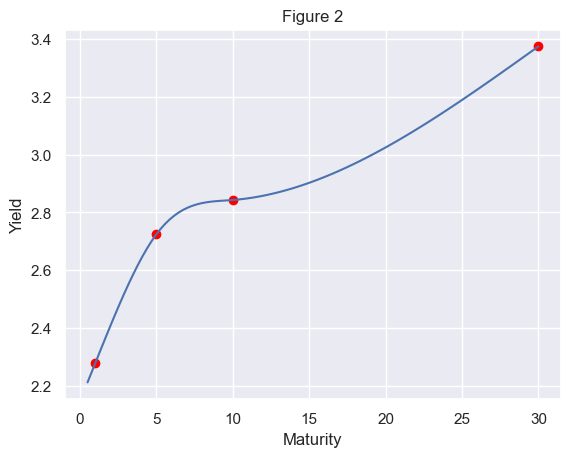

In [7]:
# Draw yield curve using Cubic-Spline model
xs = np.linspace(0.5, 30, 100) # The x-axis range from 0.5 to 300 and are divided into 100 points
y1s = plot_num(xs[xs<5].reshape(-1,1), lines[0][::-1]) # Use the first spline when t is less than 5
y2s = plot_num(xs[(xs>=5) & (xs<10)].reshape(-1,1), lines[1][::-1]) # Use the second spline when t is more than 5 and less than 10
y3s = plot_num(xs[xs>=10].reshape(-1,1), lines[2][::-1]) # Use the third spline when t is more than 10
ys = np.concatenate([y1s, y2s, y3s])
plt.plot(xs, ys)
plt.scatter(t, y, c="red") # The red dot is the true points
plt.xlabel("Maturity")
plt.ylabel("Yield")
plt.title("Figure 2")
plt.show()

From the yield curve of Cubic-Spline model, we can see that the curve is accurately passing all the ture points. In terms of fitting degree, Cubic-Spline model seems to fit better than Cubic-Spline model. The curve shows an approximately concave increasing curve. Because the increase rate of '10 Year' treasury bond is less than '5 Year' and '30 Year'. 

Compared with the Cubic-Spline model, the curve of NS model is smoother and monotone, which means that with the growth of maturity, the yield will gradually increase. This is generally in line with reality, because long-term bonds have greater risks and should have higher yields than short-term bonds.